In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sweetviz as sv
import webbrowser


In [98]:
enrolled_students = pd.read_csv('./../1.Data/TrainTest/enrolled_students.csv')
model_output_test = pd.read_csv('./../1.Data/TrainTest/model_test_odds.csv')

In [4]:
enrolled_students.head()

,Marital status_Divorced,Marital status_Married,Marital status_Other_Marital,Marital status_Single,Application mode_DegreeExperienceApp,Application mode_FirstPhaseApp,Application mode_OtherApp,Application mode_Over23App,Application mode_SecondThirdPhaseApp,Application mode_TransferApp,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,6,14,2,11.000,0,10.8,1.4,1.74
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,7,8,6,13.500,0,16.2,0.3,-0.92
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,8,9,8,11.425,0,12.7,3.7,-1.70
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,6,12,4,11.000,0,7.6,2.6,0.32
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,0,5,7,4,13.000,0,9.4,-0.8,-3.12


### Load Model

In [5]:
with open("./../1.Data/Model/pipe.pkl", "rb") as f:
    pipe = pickle.load(f)

In [111]:
predictions = pipe.predict(enrolled_students)

In [112]:
### Add predictions to the enrolled_students dataframe
enrolled_students['predictions'] = predictions

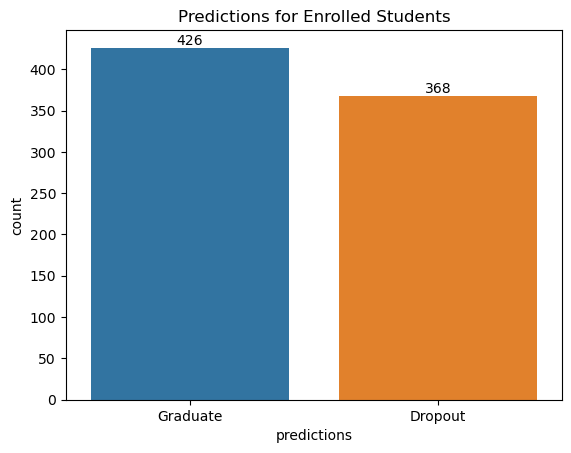

In [113]:
# Plot the predictions
sns.countplot(data = enrolled_students, x = 'predictions')
plt.title('Predictions for Enrolled Students')
plt.bar_label(plt.gca().containers[0]) #add counts
#replace 0 and 1 with Graduate and Dropout
plt.xticks([0,1], ['Graduate', 'Dropout'])
#add counts


plt.show()